# Working with Timeseries

Timeseries data is your bread and butter. Timeseries data is anything which is plotted overtime time...which is basically everything! Pandas has some great tools for manageing timeseries data easily so that you can get the knowledge from the data you need to build strategy effectively and quickly.

N.B. When sourcing timeseries data you will need to determine what time increments are best for you at that time. Pandas can help you deal with data at a microsecond level but it's not always useful to get a sample of data in seconds increments when your business sells one high ticket price item per week. Determine what the smallest time increment is that make sense for your business and start from there.

In [1]:
import pandas as pd # importing pandas library
import matplotlib.pyplot as plt #importing matplotlib library
%matplotlib inline

In [2]:
ga_page_traffic_data = pd.read_csv('data/ga_data/ga_pages.csv', 
                                   skiprows=386, 
                                   nrows=366, 
                                   usecols=['Day Index', 'Pageviews'], 
                                   parse_dates=['Day Index'],
                                   index_col='Day Index')

In [3]:
ppc_data = pd.read_csv('data/other_data/ppc_data.csv',
                       parse_dates=['Day'],
                       index_col='Day')

## Exploring timeseries data

Start every new file by exploring what the data is. Don't presume that your data is correct as this could cost you time and stress wondering why a plot or calculation isn't work.

In [4]:
ga_page_traffic_data.head()

,Pageviews
Day Index,
2018-08-31,14
2018-09-01,6
2018-09-02,17
2018-09-03,14
2018-09-04,11


In [5]:
ga_page_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2018-08-31 to 2019-08-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Pageviews  366 non-null    int64
dtypes: int64(1)
memory usage: 5.7 KB


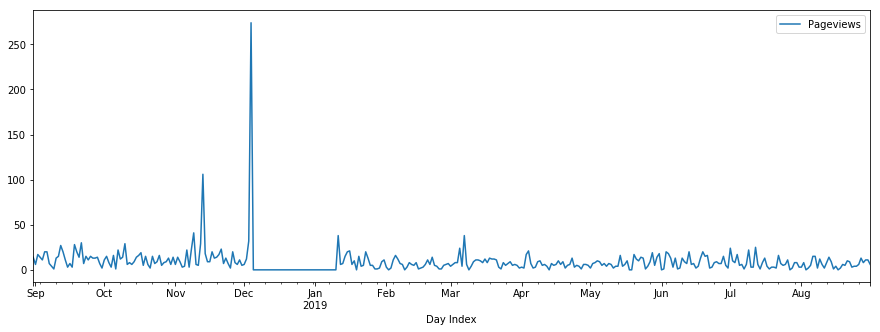

In [6]:
ga_page_traffic_data.plot(figsize=(15,5))

### Fixing missing values in the data

It can been seen in the previous visualisation of the data thatwe have some missing values. This could cause some skew in the data when we run calcuations on it. To fix this you need to take the average over the year and fill the spaces with that value. 

In [7]:
ga_page_traffic_data.describe()

,Pageviews
count,366.000000
mean,9.065574
std,16.412694
min,0.000000
25%,3.000000
50%,6.000000
75%,12.000000
max,274.000000


In [8]:
#Create a variable for Pageview average
average_value = ga_page_traffic_data['Pageviews'].mean()

In [9]:
#Print the average
average_value

9.065573770491802

In [10]:
#Replace any values that are 0 with the average values
ga_page_traffic_data['Pageviews'].replace(0,
                                          average_value,
                                          inplace=True)

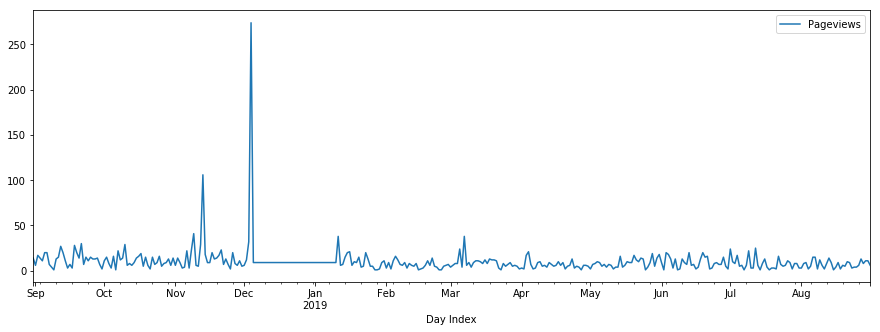

In [11]:
#Plot chart to check missing values have been replaced
ga_page_traffic_data.plot(figsize=(15,5))

## Resampling timeseries data

You'll always want to look at timeseries data in at least Daily, Weekly, Monthly, Quarterly and Yearly time . Usually you are looking for trends or issues in the data. Pandas uses a method call `resampling` to resample dates in to specificed time increments and group numerical data by a chosen calculation e.g. average.

### Monthly resampling

In [12]:
#Let's look at the data by Month using the resample method
ga_page_monthly = ga_page_traffic_data.resample('M').mean()

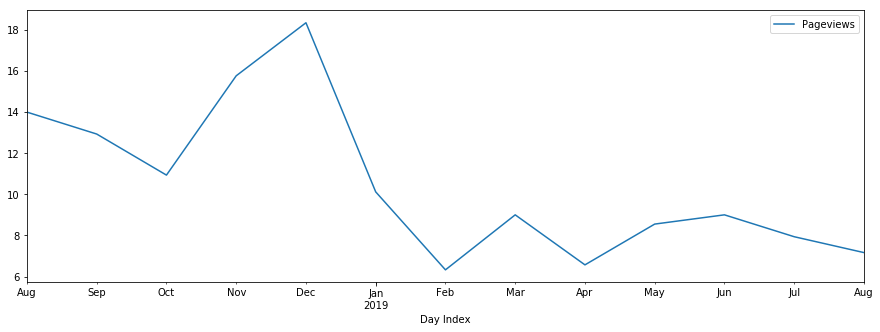

In [13]:
#Plot a monthly line graph
ga_page_monthly.plot(figsize=(15,5))

## Quarterly resampling

In [17]:
#Plot a quarterly line graph
ga_page_quarterly = ga_page_traffic_data.resample('Q', convention='end').sum()

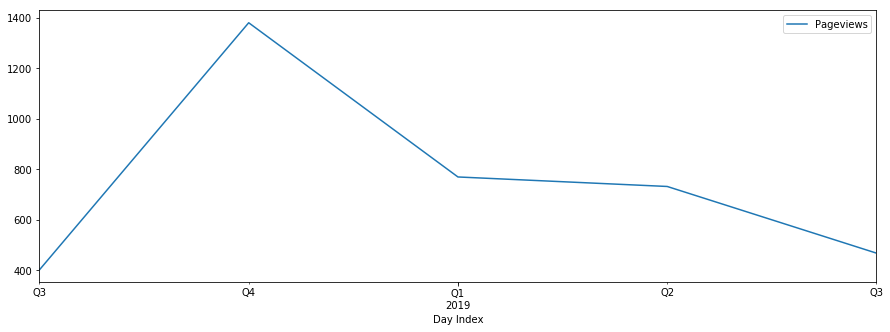

In [18]:
#Plot a quarterly line graph
ga_page_quarterly.plot(figsize=(15,5))

## Resampling and Rolling Average plots

There are two ways to view an average over time. First is the resampling which takes the average over set range of 7 day. The other is rolling average which calcualtes the averages in a rolling 7 day window. The primary difference is that resampling does not overlap on dates and rolling does. This will give you more accurate account of the average for a period than resampling will. Both are useful but it's situation dependant.

## Calculating the CPC Weekly average

In this tutorial we'll be using the weekly average to investigae the rolling price of our PPC campaign. This is an important metric to investigate as being able to optimise spend based on historical trends will improve the campaigns return on investment. There are two methods for viewing the weekly average, I'll cover them both.

In [19]:
ppc_data.head()

,Unnamed: 0,Ad group,Avg. CPC,CTR,Campaign,Clicks,Conv. rate,Conversions,Cost,Cost / conv.,Final URL,Impr.,Keyword,Keyword status,Max. CPC,Mobile final URL,Status
Day,,,,,,,,,,,,,,,,,
2018-08-31,0,miratrix_ppc_adgroup,2.490563,16.894144,miratrix_ppc,75,0.225225,1,1105.809783,1105.809783,Text,7501,keyword,Active,2.6,Text,Active
2018-09-01,1,miratrix_ppc_adgroup,2.472161,5.976134,miratrix_ppc,17,1.193317,5,1035.835572,207.167114,Text,2504,keyword,Active,2.6,Text,Active
2018-09-02,2,miratrix_ppc_adgroup,2.508561,6.824919,miratrix_ppc,3,0.107411,1,2335.470042,2335.470042,Text,6354,keyword,Active,2.6,Text,Active
2018-09-03,3,miratrix_ppc_adgroup,2.548919,8.058366,miratrix_ppc,99,2.723735,7,655.072102,93.581729,Text,2071,keyword,Active,2.6,Text,Active
2018-09-04,4,miratrix_ppc_adgroup,2.414868,6.884937,miratrix_ppc,93,1.464435,7,1154.306794,164.900971,Text,3291,keyword,Active,2.6,Text,Active


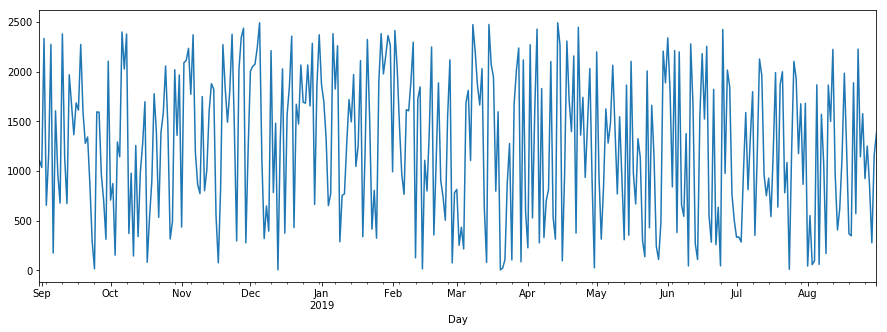

In [20]:
#Lets look at the cost data from a ppc dataset
ppc_data['Cost'].plot(figsize=(15,5))

## Weekly Resampling

In [21]:
#Lets resample that data by week and take the average
ppc_weekly = ppc_data['Cost'].resample('W').mean()
ppc_weekly.head()

Day
2018-09-02    1492.371799
2018-09-09    1073.762622
2018-09-16    1554.423832
2018-09-23    1322.445411
2018-09-30    1041.005947
Freq: W-SUN, Name: Cost, dtype: float64

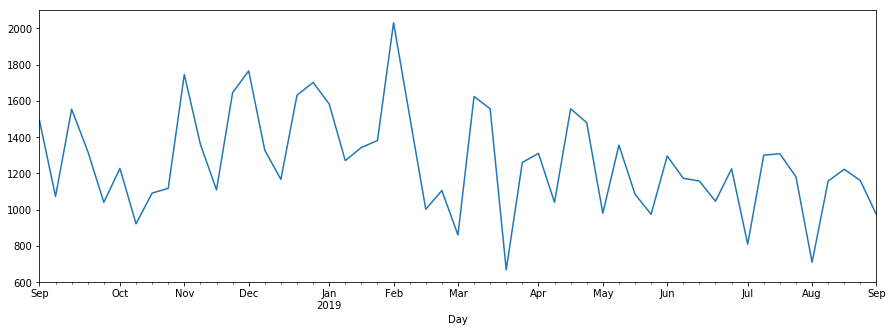

In [22]:
ppc_weekly.plot(figsize=(15,5))

## Rolling average

In [34]:
ppc_rolling_7d = ppc_data['Cost'].rolling(window=7, #set a rolling window of x days
                         center=True # label each window at its midpoint
                        ).mean()
ppc_rolling_7d.head(10)

Day
2018-08-31            NaN
2018-09-01            NaN
2018-09-02            NaN
2018-09-03    1248.123595
2018-09-04    1319.591703
2018-09-05    1310.633560
2018-09-06    1073.762622
2018-09-07    1320.345163
2018-09-08    1317.992852
2018-09-09    1089.016399
Name: Cost, dtype: float64

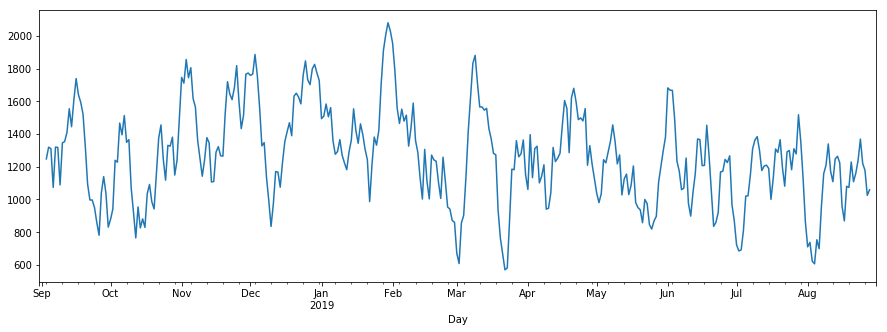

In [35]:
ppc_rolling_7d.plot(figsize=(15,5))

## Plot Weekly PPC CPC Comparison

Here we will plot three different CPC data points, Daily, Resampled Weekly and Rolling Weekly then overlay and compare the output.

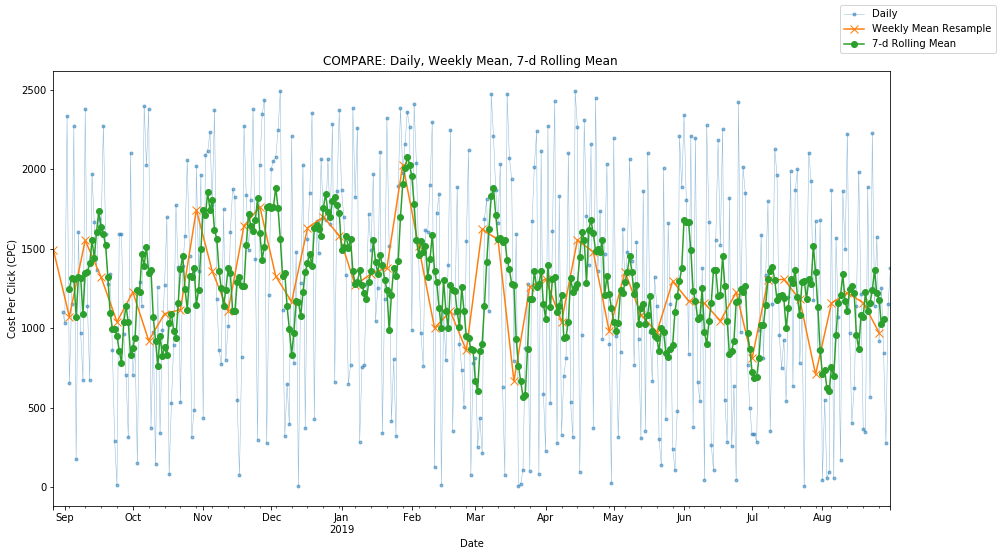

In [36]:
fig = plt.figure(figsize=(50,5)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

figsize = (15,8)

ppc_data['Cost'].plot(figsize=figsize, 
                      alpha=.5, 
                      marker='.', 
                      linestyle='-', 
                      linewidth=0.5, 
                      label='Daily'
                     )

ppc_weekly.plot(figsize=figsize,
                marker='x',
                markersize=8, 
                linestyle='-',
                label='Weekly Mean Resample'
               )

ppc_rolling_7d.plot(figsize=figsize,
                   marker='o',
                   linestyle='-',
                   label='7-d Rolling Mean'
                  )

ax.set_xlabel('Date') #name the x axis
ax.set_ylabel('Cost Per Click (CPC)') # name the primary y axis

#Global Plot settings
plt.title('COMPARE: Daily, Weekly Mean, 7-d Rolling Mean ') # set chart name
fig.legend() # set the legend

#display the charts
plt.show() 

## Adding Dynamic Annotations

You want to make as much reusable code as possible and you want to have very clear reports that anyone can read. In marketing we reguarly want to look for the highest and lowest CPC  we can created a annotation to do this dynamically. Whenever we run this code on a new ppc dataset it will automatically highligh what the max and min CPC is.

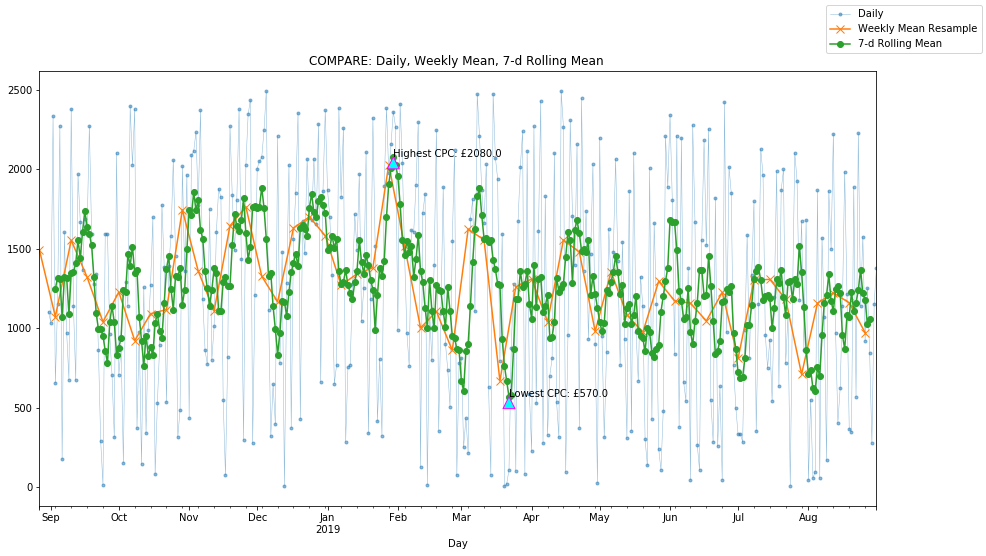

In [37]:
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(111)

figsize = (15,8)

ppc_data['Cost'].plot(figsize=figsize, 
                      alpha=.5, 
                      marker='.', 
                      linestyle='-', 
                      linewidth=0.5, 
                      label='Daily'
                     )

ppc_weekly.plot(figsize=figsize,
                marker='x',
                markersize=8, 
                linestyle='-',
                label='Weekly Mean Resample'
               )

ppc_rolling_7d.plot(figsize=figsize,
                   marker='o',
                   linestyle='-',
                   label='7-d Rolling Mean'
                  )

max_value = ppc_rolling_7d.max()
max_value_index = ppc_rolling_7d.idxmax()

min_value = ppc_rolling_7d.min()
min_value_index = ppc_rolling_7d.idxmin()



#Create dynamic annotations for max values
ax.annotate('Highest CPC: £{}'.format(max_value.round()),
            xy=(max_value_index,max_value),
            xytext=(max_value_index,max_value),
            arrowprops=dict(facecolor='cyan', #colour
                            shrink=0.05, #length of arrow
                            lw=1, #line width
                            ec='magenta', #boarder colour
                            zorder=1)) #layering order of annotation

#Create dynamic annotations for min values
ax.annotate('Lowest CPC: £{}'.format(min_value.round()),
            xy=(min_value_index,min_value),
            xytext=(min_value_index,min_value),
            arrowprops=dict(facecolor='cyan', #colour
                            shrink=0.0, #length of arrow
                            lw=1, #line width
                            ec='magenta', #boarder colour
                            zorder=1)) #layering order of annotation


#Global Plot settings
plt.title('COMPARE: Daily, Weekly Mean, 7-d Rolling Mean ') # set chart name
fig.legend() # set the legend

#display the charts
plt.show() 